<a href="https://colab.research.google.com/github/andrillion/Projects/blob/master/Customer_churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Customer Churn Prediction

### 1. Import libraries

In [159]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, balanced_accuracy_score, roc_auc_score, precision_score, recall_score, f1_score, make_scorer

import xgboost as xgb
import warnings
warnings.filterwarnings('ignore')


In [160]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [161]:
import os
print(os.getcwd())

/content/drive/My Drive


In [162]:
%cd /content/drive/My Drive/
!pwd

/content/drive/My Drive
/content/drive/My Drive


In [163]:
import pandas as pd

# Full file path
file_path = '/content/drive/My Drive/churn.xlsx'
#file_path = '/content/drive/My Drive/fpl_.csv'


# Read the CSV file into a DataFrame
df = pd.read_excel(file_path)

# Display the first few rows of the DataFrame
df.head(50)

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices
5,4190-MFLUW,1,United States,California,Los Angeles,90020,"34.066367, -118.309868",34.066367,-118.309868,Female,...,Month-to-month,No,Credit card (automatic),55.20,528.35,Yes,1,78,5925,Competitor offered higher download speeds
6,8779-QRDMV,1,United States,California,Los Angeles,90022,"34.02381, -118.156582",34.023810,-118.156582,Male,...,Month-to-month,Yes,Electronic check,39.65,39.65,Yes,1,100,5433,Competitor offered more data
7,1066-JKSGK,1,United States,California,Los Angeles,90024,"34.066303, -118.435479",34.066303,-118.435479,Male,...,Month-to-month,No,Mailed check,20.15,20.15,Yes,1,92,4832,Competitor made better offer
8,6467-CHFZW,1,United States,California,Los Angeles,90028,"34.099869, -118.326843",34.099869,-118.326843,Male,...,Month-to-month,Yes,Electronic check,99.35,4749.15,Yes,1,77,5789,Competitor had better devices
9,8665-UTDHZ,1,United States,California,Los Angeles,90029,"34.089953, -118.294824",34.089953,-118.294824,Male,...,Month-to-month,No,Electronic check,30.20,30.2,Yes,1,97,2915,Competitor had better devices


### 2. Remove columns

In [164]:
df.drop(['Churn Label', 'Churn Score', 'CLTV', 'Churn Reason'], axis = 1, inplace = True)

df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,1
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,1


In [165]:
for column in df.columns:
    if df[column].nunique() == 1:
        print(f"Column '{column}' has only one unique value.")

Column 'Count' has only one unique value.
Column 'Country' has only one unique value.
Column 'State' has only one unique value.


In [166]:
df.columns

Index(['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code',
       'Lat Long', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen',
       'Partner', 'Dependents', 'Tenure Months', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
       'Monthly Charges', 'Total Charges', 'Churn Value'],
      dtype='object')

In [167]:
df.drop(['CustomerID', 'Count', 'Country', 'State', 'Lat Long'], axis = 1, inplace = True)

df.head()

,City,Zip Code,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,...,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value
0,Los Angeles,90003,33.964131,-118.272783,Male,No,No,No,2,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
1,Los Angeles,90005,34.059281,-118.307420,Female,No,No,Yes,2,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
2,Los Angeles,90006,34.048013,-118.293953,Female,No,No,Yes,8,Yes,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,1
3,Los Angeles,90010,34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1
4,Los Angeles,90015,34.039224,-118.266293,Male,No,No,Yes,49,Yes,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,1


In [168]:
df['City'].replace(' ', '_', regex=True, inplace=True)

df.head()

,City,Zip Code,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,...,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value
0,Los_Angeles,90003,33.964131,-118.272783,Male,No,No,No,2,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
1,Los_Angeles,90005,34.059281,-118.307420,Female,No,No,Yes,2,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
2,Los_Angeles,90006,34.048013,-118.293953,Female,No,No,Yes,8,Yes,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,1
3,Los_Angeles,90010,34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1
4,Los_Angeles,90015,34.039224,-118.266293,Male,No,No,Yes,49,Yes,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,1


In [169]:
df.columns = df.columns.str.replace(' ', '_')

df.head()

,City,Zip_Code,Latitude,Longitude,Gender,Senior_Citizen,Partner,Dependents,Tenure_Months,Phone_Service,...,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Churn_Value
0,Los_Angeles,90003,33.964131,-118.272783,Male,No,No,No,2,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
1,Los_Angeles,90005,34.059281,-118.307420,Female,No,No,Yes,2,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
2,Los_Angeles,90006,34.048013,-118.293953,Female,No,No,Yes,8,Yes,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,1
3,Los_Angeles,90010,34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1
4,Los_Angeles,90015,34.039224,-118.266293,Male,No,No,Yes,49,Yes,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,1


### 3. Handle missing data

In [170]:
df.dtypes

,0
City,object
Zip_Code,int64
Latitude,float64
Longitude,float64
Gender,object
Senior_Citizen,object
Partner,object
Dependents,object
Tenure_Months,int64
Phone_Service,object


In [171]:
df.count()

,0
City,7043
Zip_Code,7043
Latitude,7043
Longitude,7043
Gender,7043
Senior_Citizen,7043
Partner,7043
Dependents,7043
Tenure_Months,7043
Phone_Service,7043


In [172]:
missing_values = df.isnull().sum()
missing_values

,0
City,0
Zip_Code,0
Latitude,0
Longitude,0
Gender,0
Senior_Citizen,0
Partner,0
Dependents,0
Tenure_Months,0
Phone_Service,0


In [173]:
empty_strings = (df == " ").sum()
print(empty_strings)

City                  0
Zip_Code              0
Latitude              0
Longitude             0
Gender                0
Senior_Citizen        0
Partner               0
Dependents            0
Tenure_Months         0
Phone_Service         0
Multiple_Lines        0
Internet_Service      0
Online_Security       0
Online_Backup         0
Device_Protection     0
Tech_Support          0
Streaming_TV          0
Streaming_Movies      0
Contract              0
Paperless_Billing     0
Payment_Method        0
Monthly_Charges       0
Total_Charges        11
Churn_Value           0
dtype: int64


In [174]:
empty_rows = df.loc[df['Total_Charges'] == " "]

empty_rows


,City,Zip_Code,Latitude,Longitude,Gender,Senior_Citizen,Partner,Dependents,Tenure_Months,Phone_Service,...,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Churn_Value
2234,San_Bernardino,92408,34.084909,-117.258107,Female,No,Yes,No,0,No,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,0
2438,Independence,93526,36.869584,-118.189241,Male,No,No,No,0,Yes,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,0
2568,San_Mateo,94401,37.590421,-122.306467,Female,No,Yes,No,0,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,0
2667,Cupertino,95014,37.306612,-122.080621,Male,No,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,0
2856,Redcrest,95569,40.363446,-123.835041,Female,No,Yes,No,0,No,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,0
4331,Los_Angeles,90029,34.089953,-118.294824,Male,No,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,0
4687,Sun_City,92585,33.739412,-117.173334,Male,No,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,0
5104,Ben_Lomond,95005,37.078873,-122.090386,Female,No,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,0
5719,La_Verne,91750,34.144703,-117.770299,Male,No,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,0
6772,Bell,90201,33.970343,-118.171368,Female,No,Yes,Yes,0,Yes,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,0


In [175]:
df.loc[df['Total_Charges'] == " ", 'Total_Charges'] = 0

In [176]:
df.loc[df['Tenure_Months'] == 0]

,City,Zip_Code,Latitude,Longitude,Gender,Senior_Citizen,Partner,Dependents,Tenure_Months,Phone_Service,...,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Churn_Value
2234,San_Bernardino,92408,34.084909,-117.258107,Female,No,Yes,No,0,No,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,0,0
2438,Independence,93526,36.869584,-118.189241,Male,No,No,No,0,Yes,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,0,0
2568,San_Mateo,94401,37.590421,-122.306467,Female,No,Yes,No,0,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,0,0
2667,Cupertino,95014,37.306612,-122.080621,Male,No,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,0,0
2856,Redcrest,95569,40.363446,-123.835041,Female,No,Yes,No,0,No,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,0,0
4331,Los_Angeles,90029,34.089953,-118.294824,Male,No,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,0,0
4687,Sun_City,92585,33.739412,-117.173334,Male,No,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,0,0
5104,Ben_Lomond,95005,37.078873,-122.090386,Female,No,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,0,0
5719,La_Verne,91750,34.144703,-117.770299,Male,No,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,0,0
6772,Bell,90201,33.970343,-118.171368,Female,No,Yes,Yes,0,Yes,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,0,0


In [178]:
df['Total_Charges'].dtype # data type is an object

dtype('O')

In [179]:
df['Total_Charges'].astype(float) # convert to float
df.dtypes

,0
City,object
Zip_Code,int64
Latitude,float64
Longitude,float64
Gender,object
Senior_Citizen,object
Partner,object
Dependents,object
Tenure_Months,int64
Phone_Service,object


In [180]:
df.replace(' ', '_', regex = True, inplace = True)
df.head()

,City,Zip_Code,Latitude,Longitude,Gender,Senior_Citizen,Partner,Dependents,Tenure_Months,Phone_Service,...,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Churn_Value
0,Los_Angeles,90003,33.964131,-118.272783,Male,No,No,No,2,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed_check,53.85,108.15,1
1,Los_Angeles,90005,34.059281,-118.307420,Female,No,No,Yes,2,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic_check,70.70,151.65,1
2,Los_Angeles,90006,34.048013,-118.293953,Female,No,No,Yes,8,Yes,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic_check,99.65,820.50,1
3,Los_Angeles,90010,34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic_check,104.80,3046.05,1
4,Los_Angeles,90015,34.039224,-118.266293,Male,No,No,Yes,49,Yes,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank_transfer_(automatic),103.70,5036.30,1


### 4. Split the dataset into X(features) and y(target)

In [181]:
X = df.drop('Churn_Value', axis = 1).copy()
X.head()

,City,Zip_Code,Latitude,Longitude,Gender,Senior_Citizen,Partner,Dependents,Tenure_Months,Phone_Service,...,Online_Backup,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges
0,Los_Angeles,90003,33.964131,-118.272783,Male,No,No,No,2,Yes,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed_check,53.85,108.15
1,Los_Angeles,90005,34.059281,-118.307420,Female,No,No,Yes,2,Yes,...,No,No,No,No,No,Month-to-month,Yes,Electronic_check,70.70,151.65
2,Los_Angeles,90006,34.048013,-118.293953,Female,No,No,Yes,8,Yes,...,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic_check,99.65,820.50
3,Los_Angeles,90010,34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,...,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic_check,104.80,3046.05
4,Los_Angeles,90015,34.039224,-118.266293,Male,No,No,Yes,49,Yes,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank_transfer_(automatic),103.70,5036.30


In [182]:
y = df['Churn_Value'].copy()
y.head()

,Churn_Value
0,1
1,1
2,1
3,1
4,1


### 5. Use One Hot Encoding to convert categorical features (objects)

In [183]:
X.dtypes

,0
City,object
Zip_Code,int64
Latitude,float64
Longitude,float64
Gender,object
Senior_Citizen,object
Partner,object
Dependents,object
Tenure_Months,int64
Phone_Service,object


In [184]:
X.columns

Index(['City', 'Zip_Code', 'Latitude', 'Longitude', 'Gender', 'Senior_Citizen',
       'Partner', 'Dependents', 'Tenure_Months', 'Phone_Service',
       'Multiple_Lines', 'Internet_Service', 'Online_Security',
       'Online_Backup', 'Device_Protection', 'Tech_Support', 'Streaming_TV',
       'Streaming_Movies', 'Contract', 'Paperless_Billing', 'Payment_Method',
       'Monthly_Charges', 'Total_Charges'],
      dtype='object')

In [185]:
X_encoded = pd.get_dummies(X, columns = ['City', 'Gender', 'Senior_Citizen',
       'Partner', 'Dependents', 'Phone_Service',
       'Multiple_Lines', 'Internet_Service', 'Online_Security',
       'Online_Backup', 'Device_Protection', 'Tech_Support', 'Streaming_TV',
       'Streaming_Movies', 'Contract', 'Paperless_Billing', 'Payment_Method']).astype(int)

X_encoded.head()

,Zip_Code,Latitude,Longitude,Tenure_Months,Monthly_Charges,Total_Charges,City_Acampo,City_Acton,City_Adelanto,City_Adin,...,Streaming_Movies_Yes,Contract_Month-to-month,Contract_One_year,Contract_Two_year,Paperless_Billing_No,Paperless_Billing_Yes,Payment_Method_Bank_transfer_(automatic),Payment_Method_Credit_card_(automatic),Payment_Method_Electronic_check,Payment_Method_Mailed_check
0,90003,33,-118,2,53,108,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
1,90005,34,-118,2,70,151,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
2,90006,34,-118,8,99,820,0,0,0,0,...,1,1,0,0,0,1,0,0,1,0
3,90010,34,-118,28,104,3046,0,0,0,0,...,1,1,0,0,0,1,0,0,1,0
4,90015,34,-118,49,103,5036,0,0,0,0,...,1,1,0,0,0,1,1,0,0,0


In [186]:
y.unique()

array([1, 0])

### 6. Create a train and test split

In [190]:
sum(y)/len(y) #unbalanced, since only 27% churn, so we need to stratify when doing the train test split

0.2653698707936959

In [192]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size = 0.2, random_state = 42, stratify = y)

In [193]:
sum(y_train)/len(y_train)

0.2653532126375577

In [194]:
sum(y_test)/len(y_test)

0.2654364797728886

In [199]:
clf_xgb = xgb.XGBClassifier(objective:= 'binary:logistic', eval_metric='aucpr', seed = 42)
clf_xgb.fit(X_train, y_train, verbose = True, eval_set = [(X_test, y_test)])

[0]	validation_0-aucpr:0.64953
[1]	validation_0-aucpr:0.65817
[2]	validation_0-aucpr:0.65731
[3]	validation_0-aucpr:0.66194
[4]	validation_0-aucpr:0.65739
[5]	validation_0-aucpr:0.65762
[6]	validation_0-aucpr:0.65764
[7]	validation_0-aucpr:0.65924
[8]	validation_0-aucpr:0.66190
[9]	validation_0-aucpr:0.65974
[10]	validation_0-aucpr:0.66073
[11]	validation_0-aucpr:0.65986
[12]	validation_0-aucpr:0.65946
[13]	validation_0-aucpr:0.66310
[14]	validation_0-aucpr:0.66318
[15]	validation_0-aucpr:0.66295
[16]	validation_0-aucpr:0.66283
[17]	validation_0-aucpr:0.66208
[18]	validation_0-aucpr:0.66267
[19]	validation_0-aucpr:0.66227
[20]	validation_0-aucpr:0.66168
[21]	validation_0-aucpr:0.66177
[22]	validation_0-aucpr:0.66199
[23]	validation_0-aucpr:0.66256
[24]	validation_0-aucpr:0.66226
[25]	validation_0-aucpr:0.66239
[26]	validation_0-aucpr:0.66080
[27]	validation_0-aucpr:0.66001
[28]	validation_0-aucpr:0.65773
[29]	validation_0-aucpr:0.65838
[30]	validation_0-aucpr:0.65765
[31]	validation_0-

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='aucpr', feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [202]:
# Predict on the validation set
y_pred = clf_xgb.predict(X_test)

In [203]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[911, 124],
       [173, 201]])

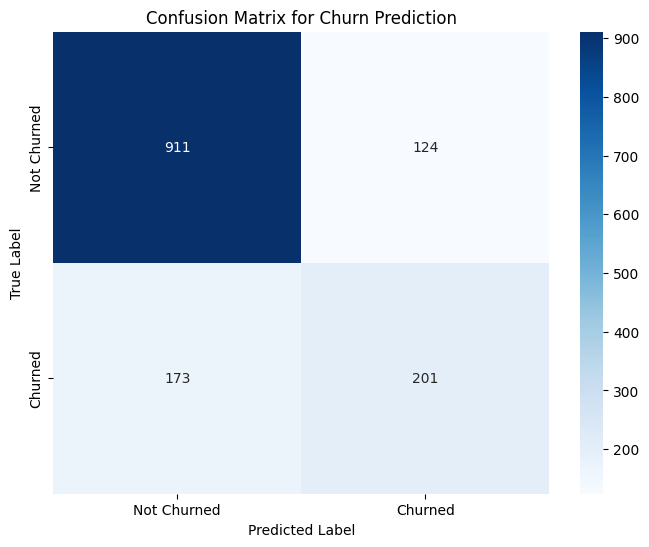

In [206]:
# Plotting the confusion matrix with appropriate labels for churn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Churned', 'Churned'],
            yticklabels=['Not Churned', 'Churned'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Churn Prediction')
plt.show()

### 7. Hyperparameter tuning with GridsearchCV

In [ ]:
# Define the hyperparameter grid to search
param_grid = {
    'n_estimators': [100, 200],            # Number of boosting rounds
    'learning_rate': [0.01, 0.1],         # Learning rate
    'max_depth': [3, 5, 7],                     # Maximum depth of a tree
    'gamma': [0, 0.1, 0.2],                     # Minimum loss reduction required to make a further partition on a leaf node
    'min_child_weight': [1, 3, 5]               # Minimum sum of instance weight (hessian) needed in a child
}

# Set up GridSearchCV with 3-fold cross-validation
grid_search = GridSearchCV(
    estimator=clf_xgb,
    param_grid=param_grid,
    scoring='roc_auc',            # Scoring metric to optimize
    cv=3,                         # 3-fold cross-validation
    verbose=1,                    # Verbosity of the output
    n_jobs=-1                     # Use all available cores
)

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# Best parameters found by GridSearchCV
print("Best Parameters:", grid_search.best_params_)
print("Best AUC Score:", grid_search.best_score_)

Fitting 3 folds for each of 108 candidates, totalling 324 fits
